# <span style = "color:blue">Lab 9 Exercise</span>
<div class = "alert alert-danger">
Name your file after your student (matric) number, for example, A1234567B_Lab9Ex.ipynb

Please let the lab facilitator check your work and mark your attendance before leaving the lab.
</div>

## <span style = "color:blue">Question 1</span>

Write a program that uses the Monte Carlo method to estimate the area of a right-angled triangle with coordinates (0,0), (p,0) and (p,q) within a unit square. Your program is to perform the following:
- Prompt for an input of the number of points to simulate
- Prompt for $p$ and $q$ ($0<p<1.0; 0<q<1.0$) (there is no necessity to check for any invalid input)
- Output the areas computed based on theory and from your simulation
- Display an appropriate plot to show the simulation

(**Hint:** Consider the equation of the line joining (0,0) and (p,q) when determining whether points lie within or outside the triangle.)

number of point: 1000
p: 0.6
q: 0.3
actual area: 0.09
estimated area: 0.086


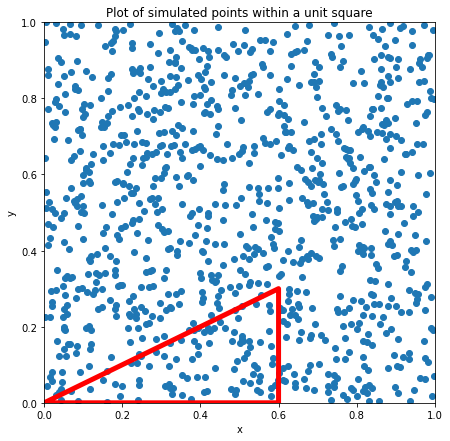

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
import numpy as np

number_of_points = int(input("number of point: "))
p = float(input("p: "))
q = float(input("q: "))

relative_area_of_triangle: int = 0

x = []
y = []
    

for n in range(number_of_points):
    random_x = np.random.rand()
    random_y = np.random.rand()
    
    if (random_x<p) and (random_y <= (q/p)*random_x):
        relative_area_of_triangle += 1

        
    x.append(random_x)    
    y.append(random_y)
    
print(f"actual area: {0.5 * p * q}")
print(f"estimated area: {(relative_area_of_triangle/number_of_points)}")
    

plt.figure(1,(7,7)) 
plt.scatter(x,y)   # Plot points within the rectangle
plt.title('Plot of simulated points within a unit square')
plt.xlabel("x")
plt.ylabel("y")
# tri = plt.Polygon([(0,0), (p,0), (p,q)], fill = None, color = "b", linewidth = 5)
plt.plot([0, p, p, 0], [0,0,q,0], color='r', linewidth=5)
plt.xlim(0,1); plt.ylim(0,1)
plt.show()
plt.figure()





## <span style = "color:blue">Question 2</span>

Write a program to simulate the playing of a casino game known as Jackpot for 100 persons. On each attempt, a set of three letters will be generated from a collection of seven letters "A", "B", "C", "D", "E", "F" and "G" randomly. Each attempt costs **1** dollar. If the three letters generated are consecutively "A" or "B" (i.e. either "AAA" or "BBB"), the player wins **50** dollars. Your program has to perform the following:
- Prompt for an input of the number of attempts _N_ (which corresponds to the number of times of playing the Jackpot for each person).
- Save the net amount won or lost accumulated at the end of _N_ attempts for each person.
- Plot a histogram of the net amount won or lost for all 100 persons (there is no fixed value for the bins as it depends on the range of the data; set between 10 and 20). 
- Compute the expected (mean) winning or loss for each person.

(**Hint:** You may consider using a nested loop over 100 persons over _N_ attempts, with each attempt having a 3-letter sequence generated randomly. Compare the 3-letter sequence generated with the winning letters and update the amount won or lost for each attempt. Reset the 3-letter sequence before the next attempt. Append the net amount won or lost for each person after _N_ attempts to a list. Reset the net amount before simulating the next person.)

**Food for thought**: For a very determined player who attempts a large number of times, will the expected net amount more likely to result in a winning or a loss?

number of attempts: 1000


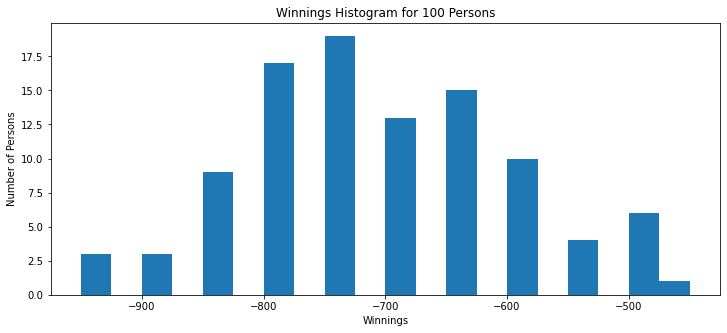

expected winnings: -715.5


In [30]:
import numpy as np

LETTERS = [i for i in range(7)] # 0 for "A", 1 for "B", 2 for "C", 3 for "D"...6 for "G"
N = int(input("number of attempts: "))

class Person:
    def __init__(self):
        self.winnings = 0
        
    def play_game(self):
        self.winnings -= 1
        generated_letters = np.random.choice(LETTERS, 3)
        set_letter = generated_letters[0]
        if set_letter == 0 or set_letter == 1:
            for i in range(2):
                if generated_letters[i+1] != set_letter:
                    break
            else:
                self.winnings += 50
                
persons = [Person() for i in range(100)]
for p in persons:
    for n in range(N):
        p.play_game()

winnings = [p.winnings for p in persons]

bins = 20

plt.figure(figsize=(12,5))
plt.hist(winnings,bins)
plt.title("Winnings Histogram for 100 Persons")
plt.xlabel("Winnings"); plt.ylabel("Number of Persons")

plt.show()

print(f"expected winnings: {np.mean(winnings)}")
        